In [1]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from IPython.display import clear_output

%matplotlib inline

# Uploading of an image

Image format: JPEG; Image shape: (646, 717); Image color scheme: RGB


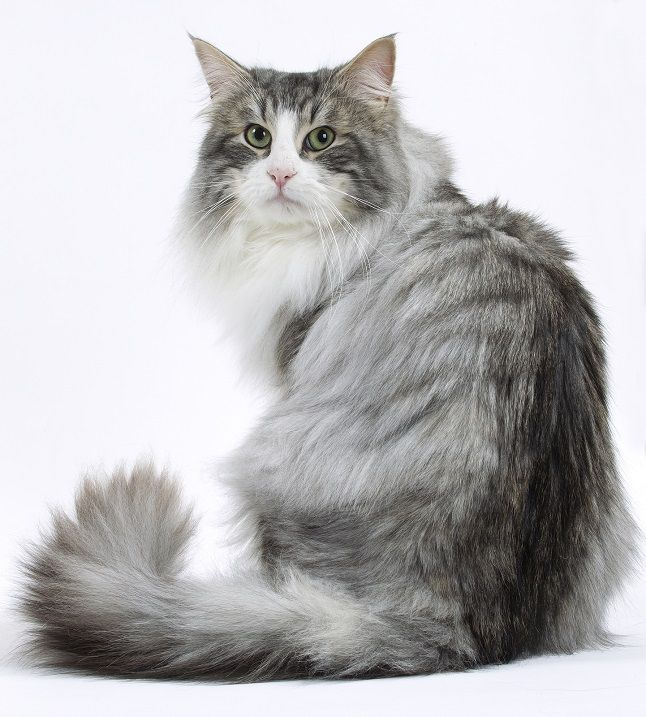

In [2]:
from PIL import Image

img = Image.open("cat.jpg") # Uploading of image
print(f"Image format: {img.format}; Image shape: {img.size}; Image color scheme: {img.mode}")
img

# Matrix representation of the image

Image matrix shape: (717, 646, 3)


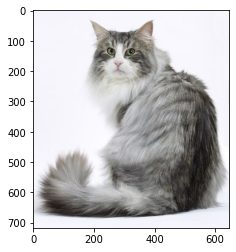

In [3]:
img_matrix = np.array(img)
print(f"Image matrix shape: {img_matrix.shape}")

# Let's draw the image with matplotlib
plt.imshow(img_matrix)
plt.show()

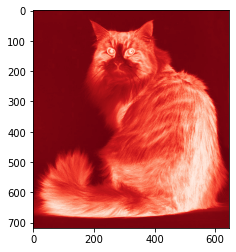

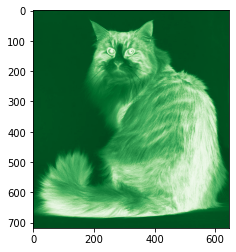

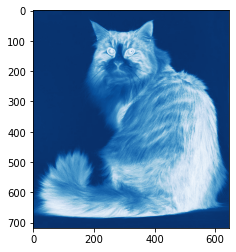

In [4]:
# Let's see on all the channels of the image separately

plt.imshow(img_matrix[:, :, 0], cmap=cm.Reds)
plt.show()

plt.imshow(img_matrix[:, :, 1], cmap=cm.Greens)
plt.show()

plt.imshow(img_matrix[:, :, 2], cmap=cm.Blues)
plt.show()

In [5]:
# Matrix form
img_matrix

array([[[246, 245, 251],
        [246, 245, 251],
        [245, 244, 250],
        ...,
        [247, 246, 252],
        [246, 245, 251],
        [246, 245, 251]],

       [[246, 245, 251],
        [246, 245, 251],
        [245, 244, 250],
        ...,
        [247, 246, 252],
        [246, 245, 251],
        [246, 245, 251]],

       [[246, 245, 251],
        [246, 245, 251],
        [245, 244, 250],
        ...,
        [247, 246, 252],
        [246, 245, 251],
        [246, 245, 251]],

       ...,

       [[248, 247, 253],
        [248, 247, 253],
        [248, 247, 253],
        ...,
        [245, 245, 253],
        [245, 245, 253],
        [244, 244, 252]],

       [[248, 247, 253],
        [248, 247, 253],
        [248, 247, 253],
        ...,
        [245, 245, 253],
        [245, 245, 253],
        [244, 244, 252]],

       [[248, 247, 253],
        [248, 247, 253],
        [248, 247, 253],
        ...,
        [245, 245, 253],
        [245, 245, 253],
        [244, 244, 252]]

## Image convolutions

One convolutional kernel transpose multichannel tensor (matrix representation of image) into a one-channel matrix in corresponds to formula of convolution. So, what if we need on output of convilutional layer a multichannel tensor? In such case we just use many convolutional kernels (one multichannel kernel tensor) and join one-channel outputs in one multichannel tensor.

In PyTorch convolution may be taken from Conv2d class.

In [6]:
import torch
from torch.nn.functional import conv2d

Converting image to PyTorch required format

In [7]:
img_tensor = torch.tensor(np.array([img_matrix]), dtype=torch.float)
img_tensor.size() # output: (number of images, higth, widness, number of channels)

torch.Size([1, 717, 646, 3])

In [8]:
img_tensor = img_tensor.permute(0, 3, 1, 2) # change order of dimensions in tensor to work with kernel
img_tensor.size() # output: (number of images, number of channels, higth, widness)

torch.Size([1, 3, 717, 646])

### Sobel horizontal operator is matrix which detects horizontal edges on image:

In [9]:
sobel_hor = np.array([[-1 , -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

In [10]:
kernel_hor = np.array([[sobel_hor, sobel_hor, sobel_hor]]) # Kernels for each of color channels
# in array, stacking of the 3 kernel matrices consequently
kernel_hor = torch.tensor(kernel_hor, dtype=torch.float) # np.array to torch.tensor
kernel_hor.size() # (number of output channels, number of input channels, higth, widness)

torch.Size([1, 3, 3, 3])

In [11]:
img_conv_hor = conv2d(img_tensor, kernel_hor) # result of convolution with horizontal Sobel kernel

img_conv_hor = img_conv_hor.permute(0, 2, 3, 1) # change order of dimensions in tensor to visualization
img_conv_hor.size() # Now we have one tensor with (number of images, higth, widness, number of channels)

torch.Size([1, 715, 644, 1])

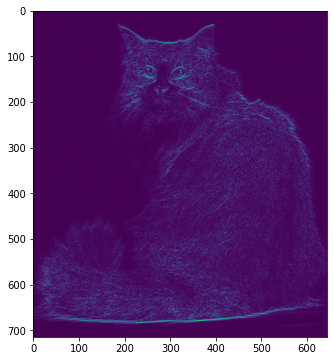

In [12]:
plt.figure(figsize=(1.5*7, 1.5*4))
plt.imshow(torch.abs(img_conv_hor[0, :, :, 0]))
plt.show() # We can see detected horizontal edges on our image (highlighted by green)

### Sobel vertical operator is matrix which detects vertical edges on image:

In [13]:
sobel_ver = np.array([[-1 , 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

In [14]:
kernel_ver = np.array([[sobel_ver, sobel_ver, sobel_ver]]) # Kernels for each of color channels
# in array, stacking of the 3 kernel matrices consequently
kernel_ver = torch.tensor(kernel_ver, dtype=torch.float)
kernel_ver.size() # (number of output channels, number of input channels, higth, widness)

torch.Size([1, 3, 3, 3])

In [15]:
img_conv_ver = conv2d(img_tensor, kernel_ver) # result of convolution with vertical Sobel kernel

img_conv_ver = img_conv_ver.permute(0, 2, 3, 1) # change order of dimensions in tensor to visualization
img_conv_ver.size() # Now we have one tensor with (number of images, higth, widness, number of channels)

torch.Size([1, 715, 644, 1])

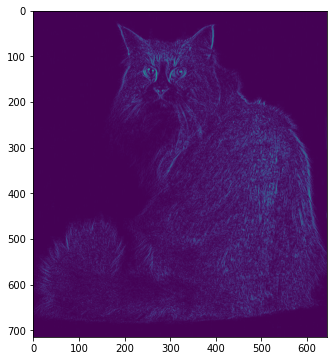

In [16]:
plt.figure(figsize=(1.5*7, 1.5*4))
plt.imshow(torch.abs(img_conv_ver[0, :, :, 0]))
plt.show() # We can see detected vertical edges on our image (highlighted by green)

### Join now results of theese convolutions

We receive two-channel output image: on it highlighted horizontal and highlighted vertical edges on image correspondingly

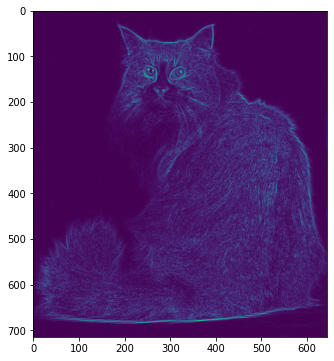

In [17]:
img_conv_hor_and_ver = torch.sqrt(img_conv_ver**2 + img_conv_hor**2)

plt.figure(figsize=(1.5*7, 1.5*4))
plt.imshow(img_conv_hor_and_ver[0, :, :, 0])
plt.show()

### Convolution with random kernel

In [18]:
import random as rand

In [19]:
rand_kernel = torch.rand((1, 3, 3, 3))

In [20]:
img_conv_rand = conv2d(img_tensor, rand_kernel) # result of convolution with vertical Sobel kernel

img_conv_rand = img_conv_rand.permute(0, 2, 3, 1) # change order of dimensions in tensor to visualization
img_conv_rand.size() # Now we have one tensor with (number of images, higth, widness, number of channels)

torch.Size([1, 715, 644, 1])

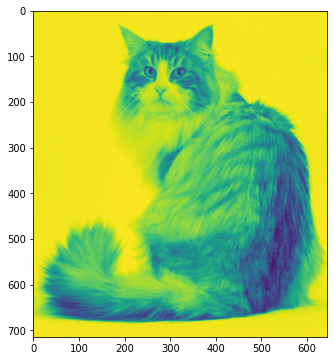

In [21]:
img_conv_rand = torch.sqrt(img_conv_rand)

plt.figure(figsize=(1.5*7, 1.5*4))
plt.imshow(img_conv_rand[0, :, :, 0])
plt.show()

## Now consider the problem of classification with MNIST images but by using convolutional neural network instead of fully connected neural network

In [22]:
import torch
import torchvision
import torch.nn as nn # neuron networks
import torch.nn.functional as F

In [23]:
# For collecting required transforms we can use module transforms of torchvision
# such object is written all the settings which we transfer to dataset when we create train and validation datasets

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize((0.1307,), (0.3081,))])

# (0. 1307,), (0.3081,) is a priori values which we know because we trained this neuron network earlier
# This values are known because this values for MNIST dataset

mnist_train = torchvision.datasets.MNIST('./mnist/', 
                                         train=True, 
                                         download=True, 
                                         transform=transform)

mnist_val = torchvision.datasets.MNIST('./mnist/', 
                                       train=False, 
                                       download=True, 
                                       transform=transform)

In [24]:
train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=64, shuffle=True)

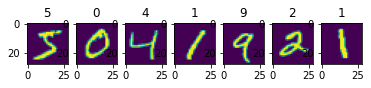

In [25]:
for i in [0, 1, 2, 3, 4, 5, 6]:
    plt.subplot(1, 7, i+1)
    # we are deleting channel dimention in image before plotting
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

### Create general function for fitting models

In [26]:
def train(model, optimizer, epochs, loss_func):
    for epoch in range(epochs+1):
        for x_train, y_train in tqdm(train_dataloader):   
            y_pred = model(x_train)                     # do predictions
            loss = loss_func(y_pred, y_train)           # calculate loss
            loss.backward()                             # calculate gradient
            optimizer.step()                            # do step of optimizer
            optimizer.zero_grad()                       # reset of gradient to avoid of summing with values from previous steps of loop
        
        val_loss = []
        val_accuracy = []
        # validation
        with torch.no_grad():
            for x_val, y_val in tqdm(val_dataloader):
                y_pred_val = model(x_val)
                loss = loss_func(y_pred_val, y_val)
                val_loss.append(loss.item())
                val_accuracy.extend( (torch.argmax(y_pred_val, dim=-1) == y_val).detach().numpy().tolist() )
        print('Epoch: {epoch}, Loss: {loss}, Accuracy: {accuracy}'.format(
            epoch=epoch, loss=np.mean(val_loss), accuracy=np.mean(val_accuracy)
        ))

### 1. Fully connective network on MNIST:

Repeating creation of fully connected network by using general function (we want to compare results with work of convolutional network)

In [27]:
FC_model = nn.Sequential(
    nn.Flatten(),            # Transform image of dim = 1x28x28 into (1, 784) vector
    nn.Linear(28*28, 128),     # Adding fully connected layer with 5 neurons on input and 3 on output
    nn.ReLU(),               # Adding ReLU nonlinearity layer after the first layer
    nn.Linear(128, 10),      # Adding fully connected layer with 3 neurons on input and 1 on output
    nn.LogSoftmax(dim=-1)       # Using softmax function in order to give probability distribution under classes labels
)

# Optimizer for fitting of network (here we used stochastic gradient descent)
optimizer = torch.optim.SGD(FC_model.parameters(), lr=0.01)

In [28]:
loss_func = nn.NLLLoss()
epochs = 10

train(FC_model, optimizer, 10, loss_func) # training of model

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.31820862839935693, Accuracy: 0.9089


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1, Loss: 0.2650704152265172, Accuracy: 0.9243


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, Loss: 0.22660274765673716, Accuracy: 0.9352


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3, Loss: 0.2038103958508771, Accuracy: 0.9413


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, Loss: 0.18341121777512465, Accuracy: 0.9468


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 5, Loss: 0.16656726363832783, Accuracy: 0.9517


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 6, Loss: 0.15546368481294745, Accuracy: 0.9563


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 7, Loss: 0.14374800875877877, Accuracy: 0.9596


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 8, Loss: 0.13362908271989624, Accuracy: 0.9614


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 9, Loss: 0.13053853621196215, Accuracy: 0.9627


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 10, Loss: 0.1210315663865797, Accuracy: 0.9641


### 2. Convolutional network on MNIST:

In [29]:
conv_model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5), # Convolutional layer with 10 kernels (10 layers on output)
    nn.ReLU(),               # Adding of ReLU nonlinearity layer
    nn.MaxPool2d(4),         # Reducing the output image by 4 times
    nn.Flatten(),            # Transform tensor of dim = 6x6x10 into (1, 360) vector
    nn.Linear(6*6*10, 128),  # Adding of fully connected layer with 360 neurons on input and 128 on output
    nn.ReLU(),               # Adding of ReLU nonlinearity layer
    nn.Linear(128, 10),      # Adding of fully connected layer with 128 neurons on input and 10 on output
    nn.LogSoftmax(dim=-1)       # Using softmax function in order to give probability distribution under classes labels
)

# Optimizer for fitting of network (here we used stochastic gradient descent)
optimizer = torch.optim.SGD(conv_model.parameters(), lr=0.01)

In [30]:
loss_func = nn.NLLLoss()
epochs = 10

train(conv_model, optimizer, 10, loss_func) # training of model

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.21210332770066656, Accuracy: 0.9426


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1, Loss: 0.1332948410818294, Accuracy: 0.9616


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, Loss: 0.12900581324745894, Accuracy: 0.9624


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3, Loss: 0.0910556921023567, Accuracy: 0.9723


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, Loss: 0.0774653220466178, Accuracy: 0.9741


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 5, Loss: 0.07810237665607292, Accuracy: 0.9742


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 6, Loss: 0.0631623594490752, Accuracy: 0.9791


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 7, Loss: 0.05890125164074028, Accuracy: 0.9808


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 8, Loss: 0.05319786032033005, Accuracy: 0.982


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 9, Loss: 0.05768049968952301, Accuracy: 0.9807


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 10, Loss: 0.048902365788342846, Accuracy: 0.9827


#### Conclusion: seems to convolutional neural networks is better thas fully connective

### Let's make our convolutional network more complicated

In [33]:
conv_compl_model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=5), # Convolutional layer with 10 kernels (10 layers on output)
    nn.ReLU(),               # Adding of ReLU nonlinearity layer
    nn.MaxPool2d(2),         # Reducing the output image by 4 times
    nn.Conv2d(in_channels=10, out_channels=20, kernel_size=5), # Convolutional layer with 20 kernels (20 layers on output)
    nn.ReLU(),               # Adding of ReLU nonlinearity layer
    nn.MaxPool2d(2),         # Reducing the output image by 4 times
    nn.Flatten(),            # Transform tensor of dim = 6x6x10 into (1, 4*4*20) vector
    nn.Linear(4*4*20, 128),  # Adding of fully connected layer with 4*4*20 neurons on input and 128 on output
    nn.ReLU(),               # Adding of ReLU nonlinearity layer
    nn.Linear(128, 10),      # Adding of fully connected layer with 128 neurons on input and 10 on output
    nn.LogSoftmax(dim=-1)       # Using softmax function in order to give probability distribution under classes labels
)

# Optimizer for fitting of network (here we used stochastic gradient descent)
optimizer = torch.optim.SGD(conv_compl_model.parameters(), lr=0.01)

In [34]:
loss_func = nn.NLLLoss()
epochs = 10

train(conv_compl_model, optimizer, 10, loss_func) # training of model

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.2055425957841858, Accuracy: 0.9398


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1, Loss: 0.11638010723907856, Accuracy: 0.9635


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, Loss: 0.08421637840972394, Accuracy: 0.9742


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3, Loss: 0.07173580179809574, Accuracy: 0.978


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, Loss: 0.06759252950881317, Accuracy: 0.9788


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 5, Loss: 0.052232768469650276, Accuracy: 0.9828


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 6, Loss: 0.05589399503093142, Accuracy: 0.9831


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 7, Loss: 0.04761396473493119, Accuracy: 0.9852


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 8, Loss: 0.04198701315482331, Accuracy: 0.9863


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 9, Loss: 0.04031399089493047, Accuracy: 0.987


  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 10, Loss: 0.03667231490034729, Accuracy: 0.9887


#### Conclusion: more complicated convolution networks often provides more quality